Project Domain / Category
Data Science/Machine Learning
Abstract / Introduction
Email becomes a powerful tool for communication as it saves a lot of time and cost. It is one of the
most popular and secure medium for online transferring and communication messages or data
through the web. But, due to the social networks, most of the emails contain unwanted information
which is called spam. To identify such spam email is one of the important challenges.
In this project we will use PYTHON text classification technique to identify or classify email spam
message. We will find accuracy, time and error rate by applying suitable algorithms (such as
NaiveBayes, NaiveBayesMultinomial and J48 etc.) on Email Dataset and we will also compare which
algorithm is best for text classification.
Functional Requirements:
Administrator will perform all these tasks.
1. Collect Data Set
• Gathering the data for Email spam contains spam and non-spam messages



In [140]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [141]:
dataset = pd.read_csv("spam_ham_dataset.csv")
dataset.head(10)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


In [142]:
y = dataset["label_num"]
X=dataset["text"]
print("x",X.shape)
print("y",y.shape)

x (5171,)
y (5171,)


2. Pre-processing
• As most of the data in the real world are incomplete containing noisy and missing values.
Therefore we have to apply Pre-processing on your data.


In [143]:
count_null=np.count_nonzero(y=="null")
count_0=np.count_nonzero(y==0)
count_1=np.count_nonzero(y==1)
print(count_null)
print(count_0)
print(count_1)

0
3672
1499


5. Train & Test Data
• Split data into 70% training & 30% testing data sets.

In [144]:
from sklearn.model_selection import train_test_split

# Perform stratified sampling to split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In [145]:
count_tr0 = np.count_nonzero(y_train==0)
count_tr1 = np.count_nonzero(y_train==1)
count_ts0 = np.count_nonzero(y_test==0)
count_ts1 = np.count_nonzero(y_test==1)
print(count_tr0)
print(count_tr1)
print(count_ts0)
print(count_ts1)

2570
1049
1102
450


3. Feature Selection
• After the pre-processing step, we apply the feature selection algorithm, the algorithm
which deploy here is Best First Feature Selection algorithm.


there is a single feature in the dataset so no need of feature engineering

4. Apply Spam Filter Algorithms.
• Handle Data: Load the dataset and split it into training and test datasets.
• Summarize Data: summarize the properties in the training dataset so that we can
calculate probabilities and make predictions.
• Make a Prediction: Use the summaries of the dataset to generate a single prediction.
• Make Predictions: Generate predictions given a test dataset and a summarized training
dataset.
• Evaluate Accuracy: Evaluate the accuracy of predictions made for a test dataset as the
percentage correct out of all predictions made.



In [146]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(X_train) 
tfidf_test=tfidf_vectorizer.transform(X_test)

In [147]:
accuracies=[]

In [148]:
# Initialize a Multinomial Naive Bayes classifier
nb = MultinomialNB()

# Fit the classifier on the training data
nb.fit(tfidf_train, y_train)

# Predict on the test set and calculate accuracy
y_pred = nb.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100,2)}%')
accuracies.append(score)


Accuracy: 92.27%


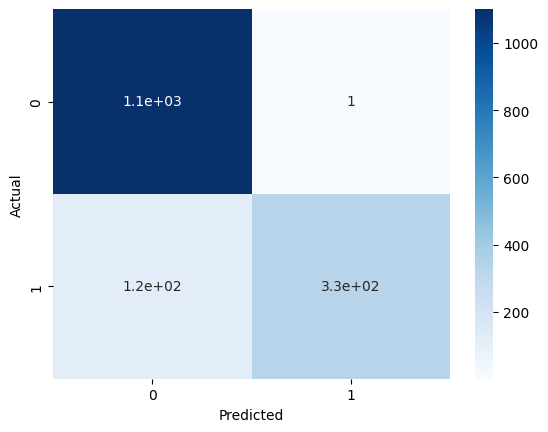

In [149]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [150]:
#Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')
accuracies.append(score)

Accuracy: 98.84%


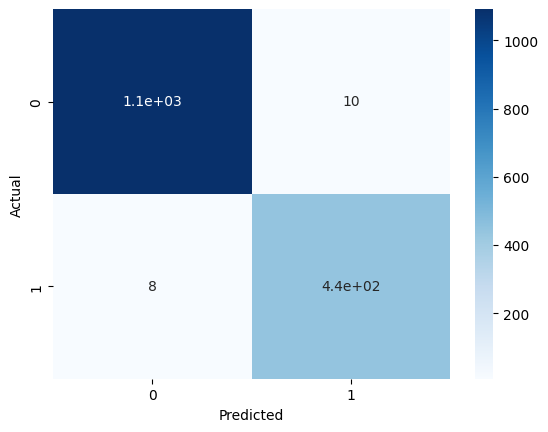

In [151]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [152]:
#using logistic regression 
lr = LogisticRegression()

# Fit the model on the training data
lr.fit(tfidf_train, y_train)

# Predict on the test set and calculate accuracy
y_pred = lr.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100,2)}%')
accuracies.append(score)

Accuracy: 98.84%


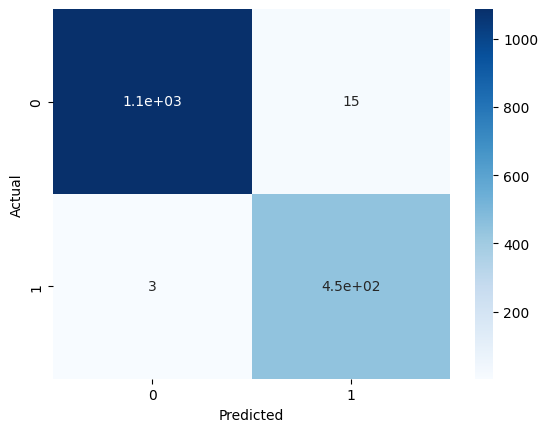

In [153]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [154]:
# Initialize XGBoost classifier
xgb = XGBClassifier()

# Fit the classifier on the training data
xgb.fit(tfidf_train, y_train)

# Predict on the test set and calculate accuracy
y_pred = xgb.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
accuracies.append(score)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 97.16%


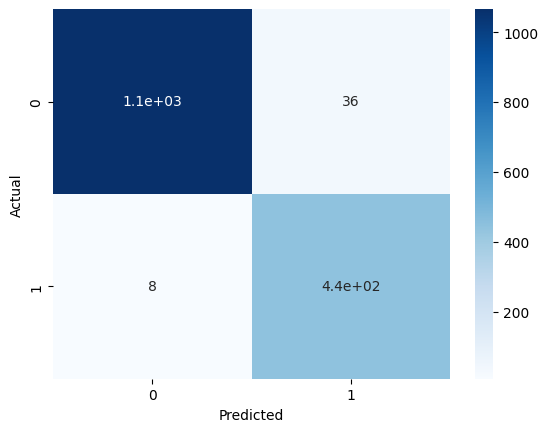

In [155]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [156]:
# Initialize a Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100)

# Fit the model on the training data
rfc.fit(tfidf_train, y_train)

# Predict on the test set and calculate accuracy
y_pred = rfc.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100,2)}%')
accuracies.append(score)
# Build confusion matrix
confusion_matrix(y_test, y_pred, labels=[0, 1])

Accuracy: 97.68%


array([[1074,   28],
       [   8,  442]])

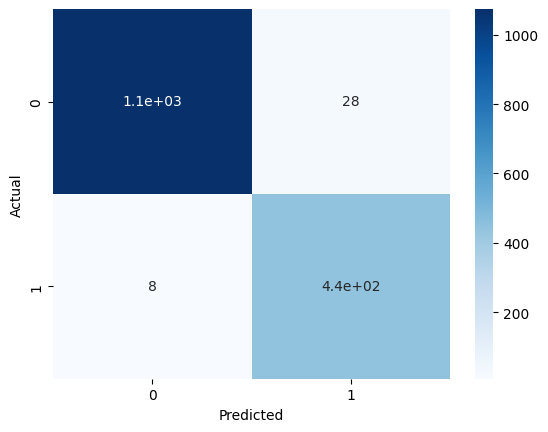

In [157]:
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [158]:
# Initialize an SVM classifier
svm = SVC(kernel='linear', C=1.0, random_state=42)

# Fit the SVM classifier on the training data
svm.fit(tfidf_train, y_train)

# Predict on the test set and calculate accuracy
y_pred = svm.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100,2)}%')
accuracies.append(score)

Accuracy: 98.84%


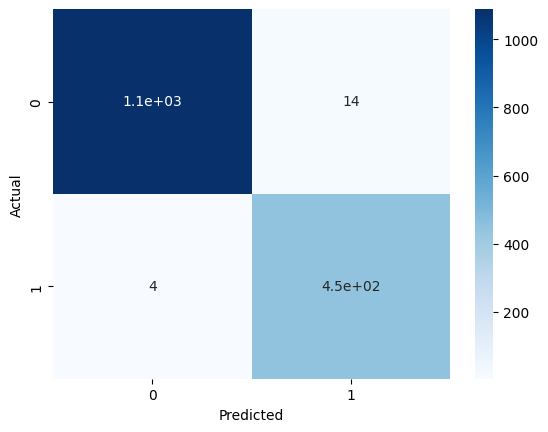

In [159]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

6. Confusion Matrix
• Create a confusion matrix table to describe the performance of a classification model.
7. Accuracy
• Find Accuracy of all algorithm and compare

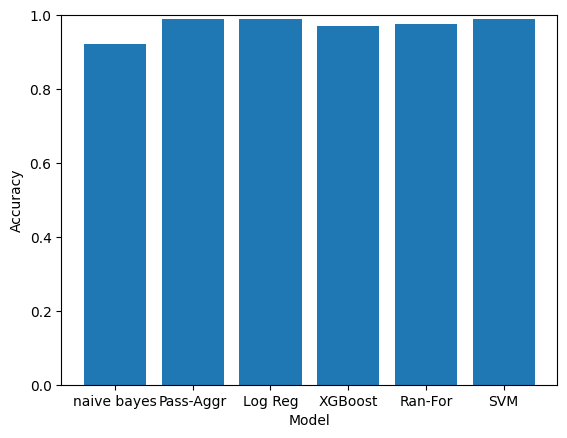

In [160]:
import matplotlib.pyplot as plt
plt.bar(['naive bayes','Pass-Aggr','Log Reg', 'XGBoost', 'Ran-For', 'SVM'], accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()

svm, passive aggressive and logistic regression provides the highest accuracy of 98.84%